Copyright (c) 2017-2019 [Serpent-Tools developer team](https://github.com/CORE-GATECH-GROUP/serpent-tools/graphs/contributors), GTRC

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Data files are not included with the python package, but can be downloaded from the [GitHub repository](https://github.com/CORE-GATECH-GROUP/serpent-tools). For this tutorial, the files are placed in the directory identified with the ``SERPENT_TOOLS_DATA`` environment variable.

In [1]:
import os
sfile = os.path.join(
    os.environ["SERPENT_TOOLS_DATA"],
    "flattop_sens.m")

# Sensitivity Reader

As of SERPENT 2.1.29, the ability to compute sensitivities using Generalized Perturbation Theory [1]. An overview of the functionality, and how to enable these features is included on the [SERPENT wiki - Sensitivity Calculations](http://serpent.vtt.fi/mediawiki/index.php/Sensitivity_calculations). Sensitivity calculations produce `_sens.m` or `_sensN.m` files, depending on the version of SERPENT, and contain a collection of arrays and indexes, denoting the sensitivity of a quantity to perturbations in isotopic parameters, such as cross sections or fission spectrum. These perturbations can be applied to specific materials and/or isotopes.

The `SensitivityReader` is capable of reading this file and storing all the arrays and perturbation parameters contained therein. A basic plot method is also contained on the reader.

In [2]:
%matplotlib inline
from matplotlib import pyplot
import serpentTools

In [3]:
sens = serpentTools.read(sfile)

The arrays that are stored in `sensitivities` and   `energyIntegratedSens` are stored under converted names. The original names from SERPENT are of the form `ADJ_PERT_KEFF_SENS` or `ADJ_PERT_KEFF_SENS_E_INT`,  respectively. Since this reader stores the resulting arrays in unique locations, the names are converted to a succinct form. The two arrays listed above would be stored both as `keff`  in `sensitivities` and `energyIntegratedSens`.  All names are converted to `mixedCaseNames` to fit the style of the project.

These arrays are quite large, so only their shapes will be shown in this notebook.

In [4]:
print(sens.sensitivities.keys(), sens.energyIntegratedSens.keys())

dict_keys(['keff']) dict_keys(['keff'])


In [5]:
print(sens.sensitivities['keff'].shape)

(1, 2, 7, 175, 2)


In [6]:
print(sens.energyIntegratedSens['keff'].shape)

(1, 2, 7, 2)


The energy grid structure and lethargy widths are stored on the reader, as `energies` and `lethargyWidths`.

In [7]:
print(sens.energies.shape)

(176,)


In [8]:
print(sens.energies[:10])

[1.00001e-11 1.00001e-07 4.13994e-07 5.31579e-07 6.82560e-07 8.76425e-07
 1.12300e-06 1.44000e-06 1.85539e-06 2.38237e-06]


In [9]:
print(sens.lethargyWidths.shape)

(175,)


In [10]:
print(sens.lethargyWidths[:10])

[9.21034  1.42067  0.25     0.249999 0.250001 0.247908 0.248639 0.253452
 0.250001 0.249999]


Ordered dictionaries `materials`, `zais`, and  `perts` contain keys of the names of their respective data, and the corresponding index, `iSENS_ZAI_zzaaai`,  in the sensitivity arrays. These arrays are zero-indexed, so the first item will have an index of zero. The data stored in the `sensitivities` and `energyIntegratedSens` dictionaries has the exact same structure as if the arrays were loaded into `MATLAB`/`Octave`, but with zero-indexing.

In [11]:
print(sens.materials)

OrderedDict([('total', 0)])


In [12]:
print(sens.zais)

OrderedDict([('total', 0), (922380, 1)])


In [13]:
print(sens.perts)

OrderedDict([('total xs', 0), ('ela scatt xs', 1), ('sab scatt xs', 2), ('inl scatt xs', 3), ('capture xs', 4), ('fission xs', 5), ('nxn xs', 6)])


## Plotting
The `SensitivityReader` has a `plot` method for visualizing the sensitivities. 

**NOTE** 
Without additional arguments, other than the name of the array, the plot method will plot **all** permutations of materials, isotopes, and isotope perturbations present. This can lead to a very busy plot and legend, so it is recommended that additional arguments are passed.

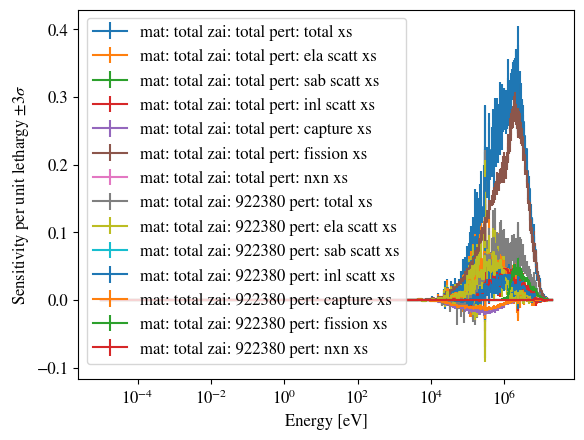

In [14]:
sens.plot('keff');

The following arguments can be used to filter the data present:

|key|Action|
|-|-|
|`'zai'`|Isotopes(s) of interest|
|`'pert'`|Perturbation(s) of interest|
|`'mat'`|Material(s) of interest|

The `sigma` argument can be used to adjust the confidence interval applied to the plot.
The `labelFmt` argument can be used to modify the label used for each plot. The following replacements will be made:

1. `{r}` - name of the response being plotted
1. `{m}` - name of the material
1. `{z}` - isotope zai
1. `{p}` - specific perturbation


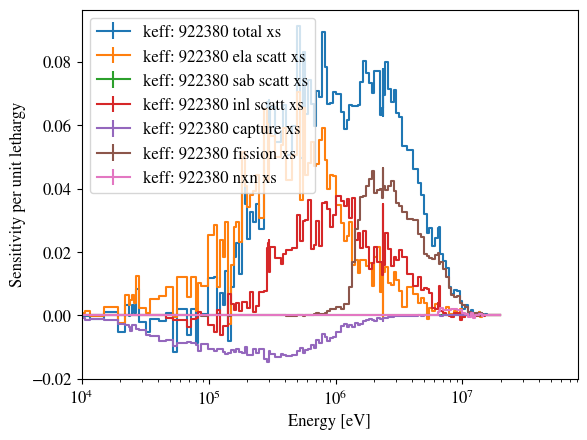

In [15]:
ax = sens.plot('keff', 922380, mat='total', sigma=0,
                            labelFmt="{r}: {z} {p}")
ax.set_xlim(1E4);  # set the lower limit to be closer to what we care about

The argument `normalize` is used to turn on/off normalization per unit lethargy, while `legend` can be used to turn off the legend, or set the legend outside the plot.

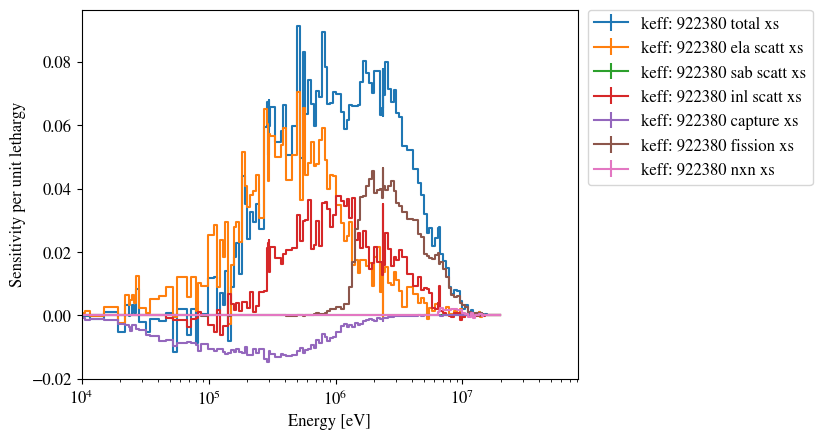

In [16]:
ax = sens.plot('keff', 922380, mat='total', sigma=0,
                            labelFmt="{r}: {z} {p}", legend='right')
ax.set_xlim(1E4);  # set the lower limit to be closer to what we care about

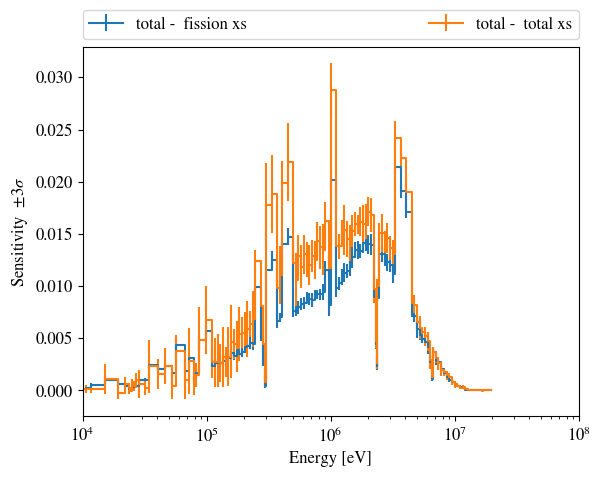

In [17]:
sens.plot('keff', zai='total', pert=['total xs', 'fission xs'], labelFmt="{z} -  {p}", 
                   legend='above', ncol=2, normalize=False)
pyplot.xlim(1E4, 1E8);

## Conclusion
The `SensitivityReader` can quickly read sensitivity files, and stores all data present in the file. A versatile plot method can be used to quickly visualize sensitivities.

## References
[1] Aufiero, M. et al. "A collision history-based approach to sensitivity/perturbation calculations in the continuous energy Monte Carlo code SERPENT", Ann. Nucl. Energy, 152 (2015) 245-258.